In [6]:
import pandas as pd

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
sns.set_style("whitegrid", {"grid.linestyle":"--"})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from statsmodels.tsa.stattools import adfuller

In [7]:
dataset = pd.read_csv("AirPassengers.csv", parse_dates=["Month"])

In [8]:
dataset.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
dataset.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [13]:
dataset.set_index("Month", inplace=True)

First day present in the data.

In [15]:
dataset.index.values.min()

numpy.datetime64('1949-01-01T00:00:00.000000000')

Last day present in the data.

In [16]:
dataset.index.values.max()

numpy.datetime64('1960-12-01T00:00:00.000000000')

Text(0.5, 0, 'Month')

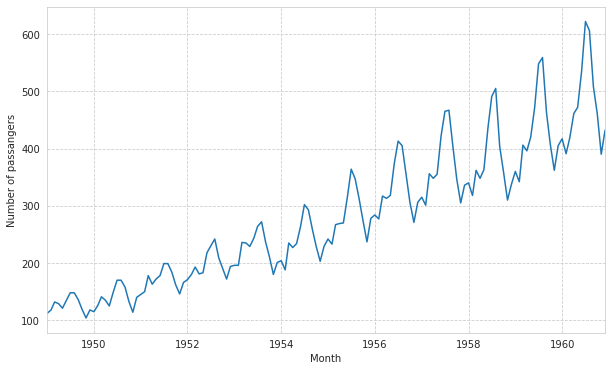

In [18]:
plt.figure(figsize=(10,6))
plt.plot(dataset["#Passengers"])
#Interval between the first and the last day in the data.
plt.xlim(pd.Timestamp(dataset.index.values.min()), pd.Timestamp(dataset.index.values.max()))
plt.ylabel("Number of passangers")
plt.xlabel("Month")

#Decomposition

Decomposes the components of a time series: trend, seasonality and residuals.

In [19]:
ts = seasonal_decompose(dataset["#Passengers"])

Text(0.5, 0, 'Month')

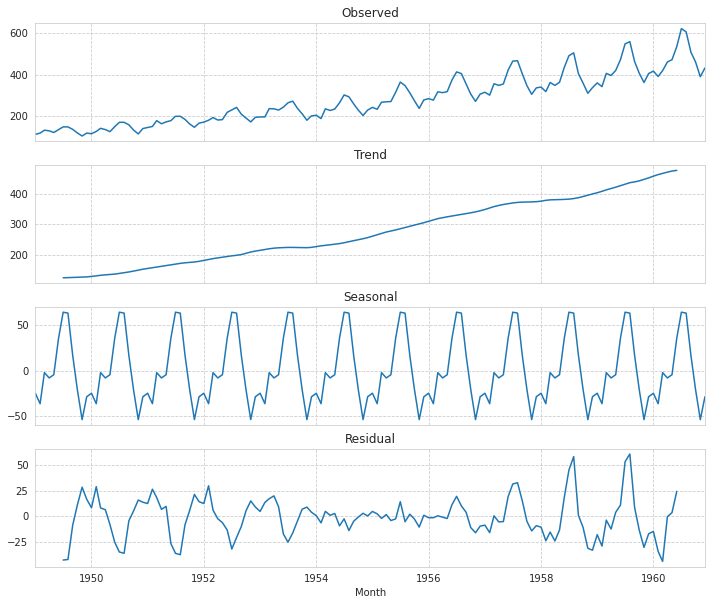

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,sharex=True, figsize=(12,10))
sns.lineplot(data=ts.observed, ax=ax1)
sns.lineplot(data=ts.trend, ax=ax2)
sns.lineplot(data=ts.seasonal, ax=ax3)
sns.lineplot(data=ts.resid, ax=ax4)
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(pd.Timestamp(dataset.index.values.min()), pd.Timestamp(dataset.index.values.max()))
for ax, title in zip([ax1, ax2, ax3, ax4], ["Observed", "Trend", "Seasonal", "Residual"]):
    ax.set_title(title)
plt.xlabel("Month")

The second graph from top to bottom shows that there is a clear trend in the number of passengers. The third graph suggests that there is a seasonality in the analyzed time series. Finally, the last graph shows potential patterns in the residuals. Based on these results, the most appropriate techniques for modeling this series can be selected.

#Stationary

Some models require the time series to be stationary. Thus, it is essential to apply a test to check the stationarity of a series.

Adfuller stationarity test.

In [22]:
ad_test = adfuller(dataset["#Passengers"])

In [23]:
print("Augmented Dickey-Fuller unit root test: {}".format(ad_test))

Augmented Dickey-Fuller unit root test: (0.815368879206047, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


In [26]:
alpha = 0.05
if ad_test[1] >= alpha:
  print("This time series is not stationary.")

This time series is not stationary.
